<a href="https://colab.research.google.com/github/AAMuktadir/image-processing/blob/main/Milestone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical, plot_model
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pathlib
from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.filters import unsharp_mask

In [ ]:
!gdown 1volrqRL3dWXliiQawsGgifJd1BkJiEiz
!unzip -q "Group_4.zip" -d ""

Downloading...
From: https://drive.google.com/uc?id=1volrqRL3dWXliiQawsGgifJd1BkJiEiz
To: /content/Group_4.zip
100% 4.93M/4.93M [00:00<00:00, 121MB/s]


In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

train_folder = 'Group_4/train'
class_names = os.listdir(train_folder)

class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_folder, class_name)
    if os.path.isdir(class_path):
        class_count = len(os.listdir(class_path))
        class_counts[class_name] = class_count

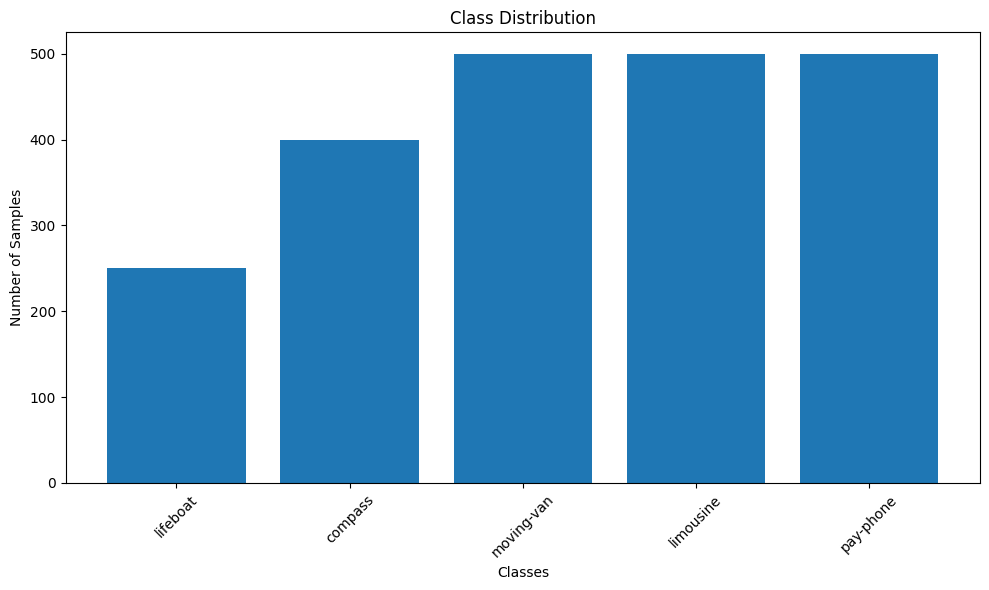

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import os
from skimage import io
from skimage.color import rgb2lab

def get_luminance(image_path):
    image = io.imread(image_path)
    image = unsharp_mask(image, radius=2, amount=1)
    if len(image.shape) == 3:
        image = rgb2lab(image)
        image = image[:, :, 0]
    return image


def get_train_test(train_image_path, test_image_path, genarate_val=False, val_size=0.2, image_format='jpg'):
    train_image_paths = [str(i) for i in pathlib.Path(train_image_path).glob(f'*/*.{image_format}')]
    test_image_paths = [str(i) for i in pathlib.Path(test_image_path).glob(f'*/*.{image_format}')]
    X_train = np.array([get_luminance(path) for path in train_image_paths])
    X_test = np.array([get_luminance(path) for path in test_image_paths])

    le = preprocessing.LabelEncoder()
    le.fit([str(path).split('/')[-2] for path in train_image_paths])

    y_train = le.transform([str(path).split('/')[-2] for path in train_image_paths])
    y_test = le.transform([str(path).split('/')[-2] for path in test_image_paths])

    y_train = np.array(y_train, dtype=str)
    y_test = np.array(y_test, dtype=str)

    y_train = to_categorical(y_train, num_classes=5)
    y_test = to_categorical(y_test, num_classes=5)

    if genarate_val:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
        return X_train, X_test, y_train, y_test, X_val, y_val
    else:
        return X_train, X_test, y_train, y_test

train_image_path = 'Group_4/train'
test_image_path = 'Group_4/test'

X_train, X_test, y_train, y_test, X_val, y_val = get_train_test(
                                                train_image_path,
                                                test_image_path,
                                                genarate_val=True,
                                                image_format='JPEG'
                                                )

X_train = np.array([img.flatten() for img in X_train])
X_test = np.array([img.flatten() for img in X_test])
X_val = np.array([img.flatten() for img in X_val])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


(1720, 4096)
(1720, 5)
(250, 4096)
(250, 5)
(430, 4096)
(430, 5)


# Neural Network

In [ ]:
model = Sequential()
model.add( Input(shape = (64*64,)) )
model.add( Dense(1024, activation='sigmoid') ) #hidden layer
model.add( Dense(512, activation='sigmoid') ) #hidden layer
model.add( Dense(256, activation='sigmoid') ) #hidden layer
model.add( Dense(5, activation='softmax') ) #output layer, activation must be softmax

In [ ]:
# Compile the model
model.compile(optimizer='Adagrad',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), verbose=1, epochs=100)

Epoch 1/100
54/54 [==============================] - 2s 38ms/step - loss: 1.4036 - accuracy: 0.4238 - val_loss: 1.4926 - val_accuracy: 0.3744
Epoch 2/100
54/54 [==============================] - 2s 30ms/step - loss: 1.3867 - accuracy: 0.4384 - val_loss: 1.4830 - val_accuracy: 0.3953
Epoch 3/100
54/54 [==============================] - 2s 30ms/step - loss: 1.3650 - accuracy: 0.4529 - val_loss: 1.4753 - val_accuracy: 0.4023
Epoch 4/100
54/54 [==============================] - 2s 29ms/step - loss: 1.3524 - accuracy: 0.4698 - val_loss: 1.5235 - val_accuracy: 0.3628
Epoch 5/100
54/54 [==============================] - 2s 30ms/step - loss: 1.3485 - accuracy: 0.4430 - val_loss: 1.4851 - val_accuracy: 0.4093
Epoch 6/100
54/54 [==============================] - 2s 30ms/step - loss: 1.3668 - accuracy: 0.4721 - val_loss: 1.4974 - val_accuracy: 0.3674
Epoch 7/100
54/54 [==============================] - 2s 38ms/step - loss: 1.3522 - accuracy: 0.4680 - val_loss: 1.4806 - val_accuracy: 0.3674
Epoch 

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(y_pred)
print(y_true)

8/8 [==============================] - 0s 8ms/step
[3 4 0 3 0 0 0 0 3 4 2 2 2 0 4 0 0 3 0 0 0 2 0 3 0 0 4 0 4 0 4 0 0 0 3 2 0
 0 0 0 0 0 3 4 0 2 0 3 0 0 3 3 2 0 3 4 3 3 4 0 0 4 0 3 0 3 3 0 0 3 3 3 0 0
 3 0 3 3 3 0 0 0 3 3 0 2 3 4 2 3 3 3 4 3 3 3 3 4 4 4 3 3 4 2 3 4 4 4 4 2 3
 3 2 4 3 2 0 2 2 3 4 2 0 0 4 4 2 2 2 3 2 0 3 3 3 3 4 2 4 2 2 2 3 3 2 4 4 3
 0 3 0 4 4 3 2 0 4 4 0 0 2 3 4 0 3 0 0 2 4 4 0 2 0 4 4 3 0 3 0 0 3 3 4 4 4
 4 4 4 0 4 0 4 0 4 3 4 4 0 0 2 0 3 3 3 3 3 3 3 3 2 4 4 3 3 3 3 0 3 3 4 2 0
 3 2 2 3 0 3 2 3 2 4 3 2 3 3 3 3 3 3 3 0 3 4 3 4 3 3 4 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [ ]:
def sensitivity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[0, 0] / (cm[0, 0] + cm[0, 1])

def specificity_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[1, 1] / (cm[1, 0] + cm[1, 1])

def positive_predictive_value(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[0, 0] / (cm[0, 0] + cm[1, 0])

def negative_predictive_value(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm[1, 1] / (cm[1, 1] + cm[0, 1])

def f1_score(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return 2 * cm[0, 0] / (2 * cm[0, 0] + cm[1, 0] + cm[0, 1])

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    import itertools
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20, horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    plt.show()

In [ ]:
sensitivity = sensitivity_score(y_true, y_pred)
specificity = specificity_score(y_true, y_pred)
ppv = positive_predictive_value(y_true, y_pred)
npv = negative_predictive_value(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print('Sensitivity =', sensitivity)
print('Specificity =', specificity)
print('Positive predictive value =', ppv)
print('Negative predictive value =', npv)
print('F1 score =', f1)

Sensitivity = 1.0
Specificity = 0.0
Positive predictive value = 0.6744186046511628
Negative predictive value = nan
F1 score = 0.8055555555555556


<ipython-input-33-5e432cb8cf58>:15: RuntimeWarning: invalid value encountered in long_scalars
  return cm[1, 1] / (cm[1, 1] + cm[0, 1])


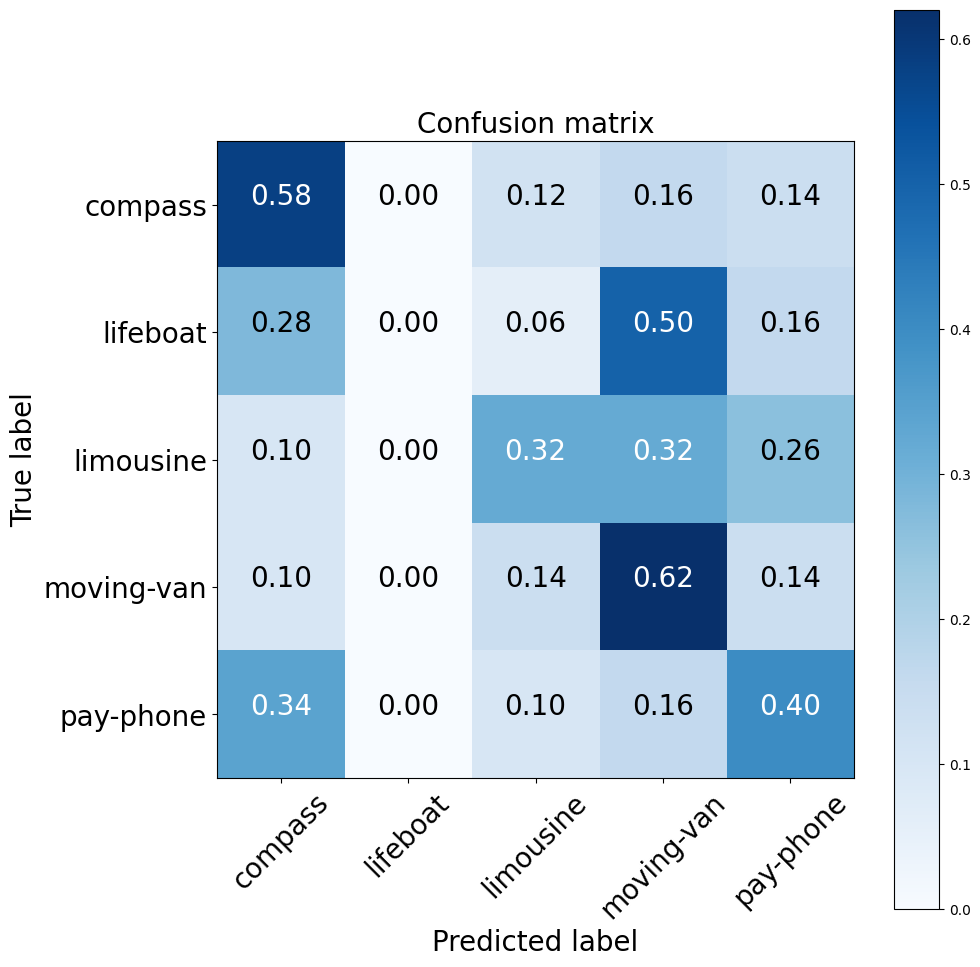

In [ ]:
plot_confusion_matrix(y_true, y_pred, classes=['compass', 'lifeboat', 'limousine', 'moving-van', 'pay-phone'], normalize=True, title='Confusion matrix')

# Logistic Regression

In [ ]:
import os
from skimage import io
from skimage.color import rgb2lab

def get_luminance(image_path):
    image = io.imread(image_path)
    image = unsharp_mask(image, radius=2, amount=1)
    if len(image.shape) == 3:
        image = rgb2lab(image)
        image = image[:, :, 0]
    return image


def get_train_test(train_image_path, test_image_path, genarate_val=False, val_size=0.2, image_format='jpg'):
    train_image_paths = [str(i) for i in pathlib.Path(train_image_path).glob(f'*/*.{image_format}')]
    test_image_paths = [str(i) for i in pathlib.Path(test_image_path).glob(f'*/*.{image_format}')]
    X_train = np.array([get_luminance(path) for path in train_image_paths])
    X_test = np.array([get_luminance(path) for path in test_image_paths])

    le = preprocessing.LabelEncoder()
    le.fit([str(path).split('/')[-2] for path in train_image_paths])

    y_train = le.transform([str(path).split('/')[-2] for path in train_image_paths])
    y_test = le.transform([str(path).split('/')[-2] for path in test_image_paths])

    y_train = np.array(y_train, dtype=str)
    y_test = np.array(y_test, dtype=str)

    if genarate_val:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
        return X_train, X_test, y_train, y_test, X_val, y_val
    else:
        return X_train, X_test, y_train, y_test

train_image_path = 'Group_4/train'
test_image_path = 'Group_4/test'

X_train, X_test, y_train, y_test= get_train_test(
                                                train_image_path,
                                                test_image_path,
                                                genarate_val=False,
                                                image_format='JPEG'
                                                )

X_train = np.array([img.flatten() for img in X_train])
X_test = np.array([img.flatten() for img in X_test])
X_val = np.array([img.flatten() for img in X_val])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


(2150, 4096)
(2150,)
(250, 4096)
(250,)


In [ ]:
X_train = np.array([img.flatten() for img in X_train])
X_test = np.array([img.flatten() for img in X_test])

In [ ]:
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
model = model.fit(X_train, y_train)

y_predict = model.predict(X_test)

acc_training = np.mean(y_train == model.predict(X_train))*100
acc_testing = np.mean(y_test == y_predict)*100
print("Training accuracy (%) =", acc_training)
print("Testing accuracy (%) =", acc_testing)

Training accuracy (%) = 100.0
Testing accuracy (%) = 29.599999999999998


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_predict = y_predict.astype(np.int)
print(y_true)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 2 3 1 1 0 1 1 2 2 2 3 4 4 4 4 3 4 3 0 4 2 0 4 0 4 1 4 4 0 4 0 0 0 2 4 0
 0 0 0 0 0 1 4 2 2 4 3 4 2 4 2 4 4 4 0 3 1 3 2 0 4 1 1 4 4 3 4 4 2 0 2 3 2
 2 4 0 3 1 2 1 2 4 3 4 4 0 4 4 0 1 2 2 1 4 1 3 2 3 0 4 3 3 3 3 0 0 3 4 4 2
 1 2 3 1 2 3 2 2 4 4 3 1 3 1 4 2 2 3 2 2 1 4 3 3 3 2 3 4 2 2 0 2 1 4 4 2 1
 0 2 2 4 4 4 4 0 4 1 0 2 2 2 4 4 2 0 2 3 4 4 4 3 4 4 0 4 4 4 4 0 3 3 3 2 2
 3 4 0 0 2 4 3 4 0 3 4 4 0 2 1 2 4 2 3 2 2 4 1 4 3 1 4 3 1 2 3 4 4 3 4 3 0
 3 2 2 4 4 4 4 2 0 3 3 4 3 3 3 2 4 3 3 1 2

<ipython-input-62-2d23a89a8136>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_predict = y_predict.astype(np.int)


In [ ]:
sensitivity = sensitivity_score(y_true, y_predict)
specificity = specificity_score(y_true, y_predict)
ppv = positive_predictive_value(y_true, y_predict)
npv = negative_predictive_value(y_true, y_predict)
f1 = f1_score(y_true, y_predict)

print('Sensitivity =', sensitivity)
print('Specificity =', specificity)
print('Positive predictive value =', ppv)
print('Negative predictive value =', npv)
print('F1 score =', f1)

Sensitivity = 0.7
Specificity = 0.5333333333333333
Positive predictive value = 0.6666666666666666
Negative predictive value = 0.5714285714285714
F1 score = 0.6829268292682927


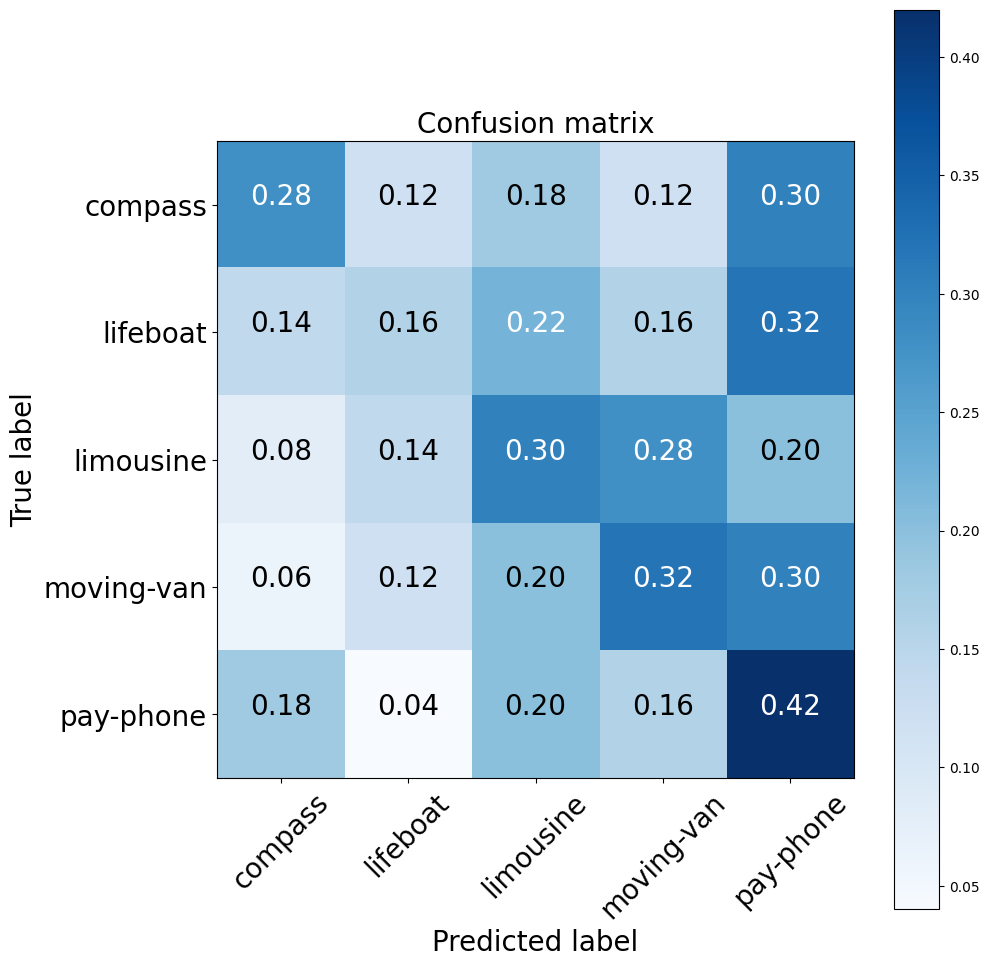

In [ ]:
plot_confusion_matrix(y_true, y_predict, classes=['compass', 'lifeboat', 'limousine', 'moving-van', 'pay-phone'], normalize=True, title='Confusion matrix')